## Install libs and gets weights

In [133]:
!wget https://pjreddie.com/media/files/yolov2.weights

--2023-04-19 20:46:30--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  42.9MB/s    in 4.8s    

2023-04-19 20:46:35 (40.6 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [13]:
!pip install plotbbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.1/151.1 kB 10.2 MB/s eta 0:00:00


## Load pretreined model

In [82]:
import cv2
import numpy as np
import tensorflow as tf
from plotbbox import plotBBox
import matplotlib.pyplot as plt

In [165]:
network = cv2.dnn.readNet('/content/yolov2.cfg', '/content/yolov2.weights')
network.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
layer_names = network.getLayerNames()
output_layers = [layer_names[i - 1] for i in network.getUnconnectedOutLayers()]

## Load test images and get boxes for predicted objects

In [181]:
sample1 = cv2.imread('/content/1.jpg')
sample2 = cv2.imread('/content/2.jpg')
sample3 = cv2.imread('/content/3.jpg')

In [183]:
def get_predictions(img):
  H, W = img.shape[:2]

  blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)
  network.setInput(blob)
  label_table = open('/content/coco.names').read().strip().split('\n')
  color_table = list(np.random.randint(0, 255, size=(len(label_table), 3), dtype='uint8'))

  for output in network.forward(output_layers):
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if confidence > 0.5:
            xmin, ymin, xmax, ymax = get_coords(detection, W, H)
            plotBBox(img, xmin, ymin, xmax, ymax, color=[int(c) for c in color_table[classID]], thickness=1, label=label_table[classID]) # plot bounding box on img
           
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()  

In [ ]:
def get_coords(detection, W, H):
  center_x = int(detection[0] * W)
  center_y = int(detection[1] * H)
  w = int(detection[2] * W)
  h = int(detection[3] * H)
  xmin = int(center_x - w / 2)
  ymin = int(center_y - h / 2)
  xmax = int(center_x + w / 2)
  ymax = int(center_y + h / 2)
  return xmin, ymin, xmax, ymax

## Results

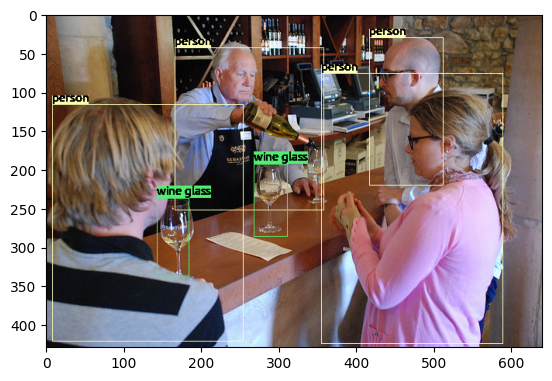

In [184]:
get_predictions(sample1)

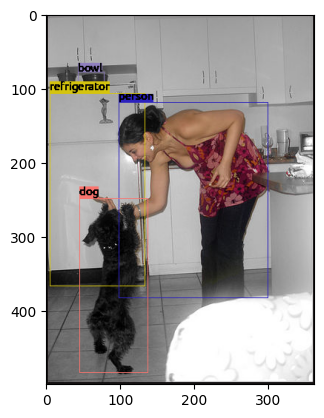

In [185]:
get_predictions(sample2)

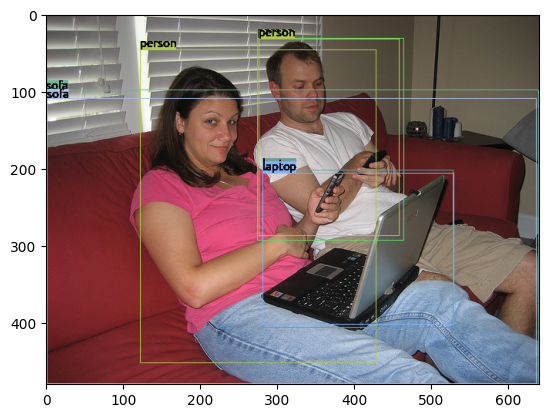

In [186]:
get_predictions(sample3)